# Lab 7: Decision Trees in Python

- **Author:** Li Zeng ([lizeng@uw.edu](mailto:lizeng@uw.edu))
- **Date:** 09 May 2016
- **Course:** INFO 371: Core Methods in Data Science

### Topics:
1. Decision Tree Classification
2. Decision Tree Regression

### References: 
 * [Scikit Learn Regression Trees](http://scikit-learn.org/stable/modules/tree.html)
 * [Scikit Learn Ensemble Methods](http://scikit-learn.org/stable/modules/ensemble.html)
 * [Introduction to Statistical Learning, Lab #7](http://www-bcf.usc.edu/~gareth/ISL/Chapter%208%20Lab.txt)

### 1. Decision Trees

In [16]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import train_test_split

In [17]:
iris = load_iris()

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
print iris.data.shape

(150L, 4L)


In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Build a decision tree classifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [22]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(100L, 4L) (100L,)
(50L, 4L) (50L,)


In [23]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

In [24]:
clf1.score(X_test, y_test)

0.97999999999999998

#### Perfect performance? Try cross-validation

In [25]:
from sklearn.cross_validation import cross_val_score

In [26]:
clf2 = tree.DecisionTreeClassifier()
cross_val_score(clf2, X_train, y_train, cv=10)

array([ 1.        ,  0.90909091,  1.        ,  0.63636364,  1.        ,
        1.        ,  1.        ,  0.88888889,  1.        ,  0.88888889])

In [27]:
cross_val_score(clf2, X_train, y_train, cv=10).mean()

0.93232323232323233

#### Play with model parameters

In [28]:
param_value = [1,2,5,10,15,20,30,40,50,60, 70, 80]
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [29]:
for value in param_value:
    clf_split = tree.DecisionTreeClassifier(min_samples_split = value)
    print value, cross_val_score(clf_split, X_train, y_train, cv=10).mean()

1 0.931414141414
2 0.941414141414
5 0.922323232323
10 0.922323232323
15 0.922323232323
20 0.922323232323
30 0.932323232323
40 0.911212121212
50 0.911212121212
60 0.921212121212
70 0.660909090909
80 0.660909090909


In [30]:
for value in param_value:
    clf_leaf = tree.DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = value)
    print value, cross_val_score(clf_leaf, X_train, y_train, cv=10).mean()

1 0.931414141414
2 0.913232323232
5 0.932323232323
10 0.921212121212
15 0.911212121212
20 0.921212121212
30 0.795353535354
40 0.639797979798
50 0.349090909091
60 0.349090909091
70 0.349090909091
80 0.349090909091


Cross-validation helps to decide the value of parameters

In [31]:
clf_good = tree.DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 5)
print cross_val_score(clf_good, X_train, y_train, cv=10).mean()

0.932323232323


#### Performance vs. Train/Test Proportion

In [32]:
%matplotlib inline  
import matplotlib.pyplot as plt  
from pylab import *

In [33]:
test_size = np.arange(0.1, 1, 0.05)

In [34]:
clf3 = tree.DecisionTreeClassifier()
test_score_ls = []
for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=size, random_state=42)
    clf3 = clf3.fit(X_train, y_train)
    test_score_ls.append(clf3.score(X_test, y_test))

In [35]:
test_score_ls = np.asarray(test_score_ls)
print test_score_ls

[ 1.          1.          1.          1.          1.          0.98113208
  0.98360656  0.98529412  0.93421053  0.95180723  0.96703297  0.94897959
  0.9245283   0.92920354  0.9338843   0.9375      0.94117647  0.94405594]


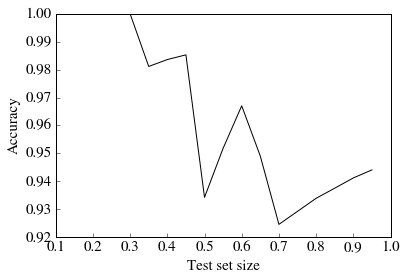

In [36]:
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
ax.plot(test_size, test_score_ls, color = 'black')

ax.set_xlabel('Test set size')
ax.set_ylabel('Accuracy')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#### Feature Importance

In [37]:
import pandas as pd

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.33, random_state=42)
clf_good = tree.DecisionTreeClassifier()
fitted = clf_good.fit(X_train, y_train)

In [39]:
feature_df = pd.DataFrame(zip(iris.feature_names, fitted.feature_importances_), columns = ['Feature', 'Importance'])

In [40]:
feature_df

,Feature,Importance
0,sepal length (cm),0.012565
1,sepal width (cm),0.029156
2,petal length (cm),0.094857
3,petal width (cm),0.863422


In [41]:
x_ax = np.arange(len(feature_df))
y_ax = feature_df.Importance

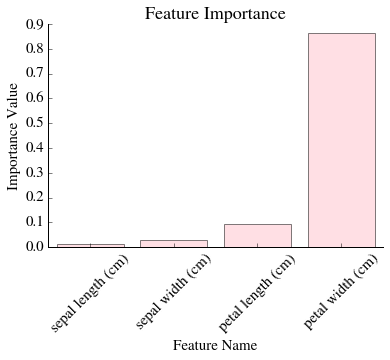

In [42]:
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax + 0.1, y_ax, width = 0.8, color = "pink", alpha = 0.5)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks = feature_df.Feature
xTickPos = x_ax + 0.5
ax.set_xticks(xTickPos)
ax.set_xticklabels(xTickMarks, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.33, random_state=42)
clf_good = tree.DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 5)
fitted = clf_good.fit(X_train, y_train)

In [44]:
feature_df = pd.DataFrame(zip(iris.feature_names, fitted.feature_importances_), columns = ['Feature', 'Importance'])
print feature_df

             Feature  Importance
0  sepal length (cm)    0.005566
1   sepal width (cm)    0.000000
2  petal length (cm)    0.577915
3   petal width (cm)    0.416520


#### Visualize decision tree

In [45]:
from sklearn.tree import export_graphviz

In [14]:
def visualize_tree(tree, feature_names, filename):
    """Create tree .dot file using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open(filename, 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)


Create tree structure as .dot file. Then, use dot file parser to generate tree graph

In [46]:
visualize_tree(clf1, iris.feature_names, "iris.dot")

### 2. Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

Version 1 - use all features

In [11]:
regressor = DecisionTreeRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.33, random_state=42)
fitted_v1 = regressor.fit(X_train, y_train)
fitted_v1.score(X_test, y_test)

0.7320607138663342

In [12]:
feature_df_boston = pd.DataFrame(zip(boston.feature_names, fitted_v1.feature_importances_), columns = ['Feature', 'Importance'])
print feature_df_boston

NameError: name 'pd' is not defined

Version 2 - use 4 features: CRIM, ZN, INDUS and CHAS

In [66]:
regressor = DecisionTreeRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(boston.data[:, 0:4], boston.target, test_size=0.33, random_state=42)
fitted_v2 = regressor.fit(X_train, y_train)

Visualize the decision tree built by four features from Boston data

In [68]:
visualize_tree(fitted_v2, boston.feature_names[0:4], "boston.dot")

### Exercise
Work in a group of 2-3 to improve the current decision tree models for predicting Boston house prices.
You could consider feature selection, parameter configuration, train/test split proportion, etc.
How does the model perform? How do you interpret the model?

In [ ]:
# Edit me!